In [9]:
# nothing but just if-esle in langGraph
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal
from langchain_groq import ChatGroq
import os
from dotenv import load_dotenv
load_dotenv()

True

In [10]:
class QuadState(TypedDict):
    a : int
    b : int
    c : int

    equation : str
    discrimination : float
    result : str

In [13]:
def showEq(state : QuadState):
    equation = f"{state['a']}x2+{state['b']}x+{state['c']}"
    return {'equation' : equation}

def calculate_disc(state : QuadState):
    discrimination =  state['b']**2 - (4*state['a']*state['c'])
    return {'discrimination' : discrimination}

def real_root(state: QuadState) -> QuadState:
    root1 = (-state['b'] + state['discrimination']**0.5)/(2*state['a'])
    root2 = (-state['b'] - state['discrimination']**0.5)/(2*state['a'])
    return {'result' : f"The roots are : {root1} and {root2}"}

def equal_root(state: QuadState) -> QuadState:
    root = (-state['b'])/(2*state['a'])
    return {'result' : f"The root is {root}"}

def imag_root(sate: QuadState):
    return {'result' : "No real root"}

def checkCond(state : QuadState) -> Literal["imag_root", "real_root", "equal_root"]:
    val = state['discrimination']
    if val < 0:
        return "imag_root"
    elif val == 0:
        return  "equal_root"
    else: return "real_root"


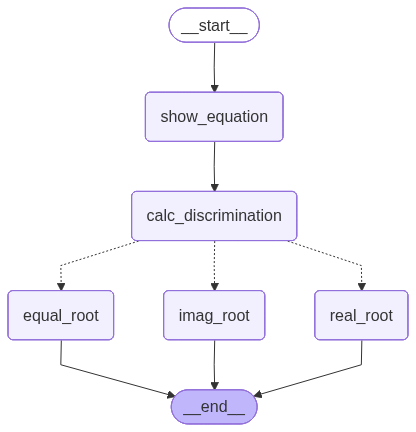

In [16]:
graph = StateGraph(QuadState)

graph.add_node("show_equation", showEq)
graph.add_node("calc_discrimination", calculate_disc)
graph.add_node("imag_root", imag_root)
graph.add_node("real_root", real_root)
graph.add_node("equal_root", equal_root)

graph.add_edge(START, "show_equation")
graph.add_edge("show_equation","calc_discrimination")
graph.add_conditional_edges("calc_discrimination", checkCond)
graph.add_edge("real_root", END)
graph.add_edge("imag_root", END)
graph.add_edge("equal_root", END)
workflow = graph.compile()
workflow

In [17]:
print(workflow.invoke({'a' : 4, 'b' : -5, 'c' : -4}))

{'a': 4, 'b': -5, 'c': -4, 'equation': '4x2+-5x+-4', 'discrimination': 89, 'result': 'The roots are : 1.8042476415070754 and -0.5542476415070754'}
